# **Lab 4: System of Linear Equations & Clustering**


# **Initialization**

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# **System of Liear Equations**

**Determinants**

[Rule of Sarrus](https://en.wikipedia.org/wiki/Rule_of_Sarrus)

In [2]:
# numpy.linalg.det(array)
import numpy as np

def determinant_recursive(A):

    determinant = 0

    if A.shape[0] == 2 and A.shape[1] == 2:

        determinant = A[0][0] * A[1][1] - A[1][0] * A[0][1]

        return determinant

    else:

        for focus_column in range(len(A)):

            remaining_height = len(A[1:])

            A_sub = []

            for i in range(1, remaining_height+1):

                A_sub.append(np.append(A[i][0:focus_column],
                                       A[i][focus_column + 1:]))

            A_sub = np.array(A_sub)

            sign = (-1) ** (focus_column % 2)

            A_sub_determinant = determinant_recursive(A_sub)

            determinant += sign * A[0][focus_column] * A_sub_determinant

    return determinant  

def determinant_triangular(A):

  determinant = 1

  for i in range(len(A)):

    determinant = determinant * A[i][i]

  return determinant

In [3]:
A = np.array([[4, 3, 2, 2],
              [0, 1, -3, 3],
              [0, -1, 3, 3],
              [0, 3, 1, 1]], dtype=float)

print("Input Matrix")

print(A)

print("Determinant: {0}".format(determinant_recursive(A)))

print("Determinant(numpy): {0}".format(np.linalg.det(A)))


B = np.array([[4, 3, 2, 2],
              [0, 1, -3, 3],
              [0, 0, 3, 3],
              [0, 0, 0, 1]], dtype=float)

print("Input Matrix")

print(B)

print("Determinant Upper Triangular: {0}".format(determinant_triangular(B)))

print("Determinant Upper Triangular (numpy): {0}".format(np.linalg.det(B)))

C = np.array([[1, 0, 0, 0],
              [2, 1, 0, 0],
              [3, 6, 3, 0],
              [4, 5, 0, 1]], dtype=float)

print("Input Matrix")

print(C)

print("Determinant Lower Triangular: {0}".format(determinant_triangular(C)))

print("Determinant Lower Triangular (numpy): {0}".format(np.linalg.det(C)))

Input Matrix
[[ 4.  3.  2.  2.]
 [ 0.  1. -3.  3.]
 [ 0. -1.  3.  3.]
 [ 0.  3.  1.  1.]]
Determinant: -240.0
Determinant(numpy): -240.0000000000002
Input Matrix
[[ 4.  3.  2.  2.]
 [ 0.  1. -3.  3.]
 [ 0.  0.  3.  3.]
 [ 0.  0.  0.  1.]]
Determinant Upper Triangular: 12.0
Determinant Upper Triangular (numpy): 12.0
Input Matrix
[[1. 0. 0. 0.]
 [2. 1. 0. 0.]
 [3. 6. 3. 0.]
 [4. 5. 0. 1.]]
Determinant Lower Triangular: 3.0
Determinant Lower Triangular (numpy): 2.999999999999999


**Cramer's Rule**

In [4]:
A = np.array([[0, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1]], dtype=float)

print("Input Matrix")

print(A, A.shape)

b = np.array([5, 7, 2, 3, 4], dtype=float)

print("Constant Vector")

print(b, b.shape)

Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]] (5, 5)
Constant Vector
[5. 7. 2. 3. 4.] (5,)


In [5]:
def cramers_rule(A, b, n):

  determinant_A = determinant_recursive(A)

  if determinant_A != 0:

    input_A = A.copy()

    x = np.zeros(n, dtype=float)

    for i in range(n):

      A[:, i] = b

      x[i] = determinant_recursive(A)/determinant_A

      A = input_A.copy()

    return x

  else:

    print('Singular Matrix')

    print('Cramer\'s Rule can not be Applied')

In [6]:
x = cramers_rule(A, b, A.shape[0])

print("Solution")

print(x, x.shape)

Solution
[0.03076923 0.78461538 1.01538462 0.15384615 0.06153846] (5,)


**Gaussian Elimination**

1. Elimination 
  
  $a_{i, j} = a_{k, j} - a_{i, j}*\frac{a_{k, k}}{a_{i, k}}$

  where 
    
    $k=1,2,...,n-1$ 
    
    $i=k+1,....,n$

    $j=k,....,n$

2. Back Substitution 
  
  $x_{i} = b_{i}/a_{i,i}$

  when $i=n$

  $x_{i}=\frac{(b_{i}-\sum_{j=i+1}^{n}a_{i,j}*x_{j})}{a_{i,i}}$

  when $i=n-1, n-2, ....,1$




In [7]:
A = np.array([[3, -2, 5, 0],
              [4, 5, 8, 1],
              [1, 1, 2, 1],
              [2, 7, 6, 5]], dtype=float)

print("Input Matrix")

print(A, A.shape)

B = np.array([[0, 7, -1, 3, 1],
              [0, 3, 4, 1, 7],
              [6, 2, 0, 2, -1],
              [2, 1, 2, 0, 2],
              [3, 4, 1, -2, 1]], dtype=float)

print("Input Matrix")

print(B, B.shape)

b_1 = np.array([2, 4, 5, 7], dtype=float)

print("Constant Vector")

print(b_1, b_1.shape)

b_2 = np.array([5, 7, 2, 3, 4], dtype=float)

print("Constant Vector")

print(b_2, b_2.shape)

Input Matrix
[[ 3. -2.  5.  0.]
 [ 4.  5.  8.  1.]
 [ 1.  1.  2.  1.]
 [ 2.  7.  6.  5.]] (4, 4)
Input Matrix
[[ 0.  7. -1.  3.  1.]
 [ 0.  3.  4.  1.  7.]
 [ 6.  2.  0.  2. -1.]
 [ 2.  1.  2.  0.  2.]
 [ 3.  4.  1. -2.  1.]] (5, 5)
Constant Vector
[2. 4. 5. 7.] (4,)
Constant Vector
[5. 7. 2. 3. 4.] (5,)


In [8]:
def forward_elimintaion_without_pivoting(A, b, n):

  for k in range(n-1):

    for i in range(k + 1, n):

      if A[i, k] == 0:

        continue

      else:

        factor = A[k, k]/A[i, k]

        for j in range(k, n):

          A[i, j] = A[k, j] - A[i, j] * factor

        b[i] = b[k] - b[i] * factor

  return A, b

def forward_elimintaion_with_partial_pivoting(A, b, n):

  for k in range(n-1):

    max_index = np.abs(A[k:,k]).argmax() + k

    if A[max_index, k] == 0:
      
      raise ValueError("Matrix is Singular.")

    if max_index != k:
            A[[k,max_index]] = A[[max_index, k]]
            b[[k,max_index]] = b[[max_index, k]]

    for i in range(k + 1, n):

      if A[i, k] == 0:

        continue

      else:

        factor = A[k, k]/A[i, k]

        for j in range(k, n):

          A[i, j] = A[k, j] - A[i, j] * factor

        b[i] = b[k] - b[i] * factor

  return A, b


def backward_substitution(A, b, n):

  x = np.zeros(n, dtype=float)

  x[n-1] = b[n-1]/A[n-1, n-1]

  for i in range(n-2, -1, -1):

    sum_a_x = 0

    for j in range(i + 1, n):

      sum_a_x = sum_a_x + A[i, j] * x[j]

    x[i] = (b[i] - sum_a_x)/A[i, i]

  return x

In [9]:
# without pivoting

A, b = forward_elimintaion_without_pivoting(A, b_1, A.shape[0])

print('Row Echelon Form of Input Matrix')

print(A, A.shape)

print('Row Echelon Form of Constants')

print(b, b.shape)

x = backward_substitution(A, b, A.shape[0])

print("Solution")

print(x, x.shape)

# with partial pivoting

B, b = forward_elimintaion_with_partial_pivoting(B, b_2, B.shape[0])

print('Row Echelon Form of Input Matrix')

print(B, B.shape)

print('Row Echelon Form of Constants')

print(b, b.shape)

x = backward_substitution(B, b, B.shape[0])

print("Solution")

print(x, x.shape)

Row Echelon Form of Input Matrix
[[ 3.         -2.          5.          0.        ]
 [ 0.         -5.75       -1.         -0.75      ]
 [ 0.          0.          0.15        2.7       ]
 [ 0.          0.          0.          2.21785714]] (4, 4)
Row Echelon Form of Constants
[ 2.         -1.         13.95       13.43035714] (4,)
Solution
[ 28.77777778   2.16666667 -16.           6.05555556] (4,)
Row Echelon Form of Input Matrix
[[   6.            2.            0.            2.           -1.        ]
 [   0.            7.           -1.            3.            1.        ]
 [   0.            0.          -43.           17.          -48.        ]
 [   0.            0.            0.         -112.          -15.75      ]
 [   0.            0.            0.            0.          108.69444444]] (5, 5)
Row Echelon Form of Constants
[  2.           5.         -44.         -18.2          6.68888889] (5,)
Solution
[0.03076923 0.78461538 1.01538462 0.15384615 0.06153846] (5,)


# **System of Linear Equations Problems**

1. Implement a faster way to calculate the determinant of a matrix. [Hint: Triangular Matrix]

In [10]:
def determinant_fast(A):

  # write the function

  return determinant

In [11]:
A = np.array([[4, 3, 2, 2],
              [1, 1, -3, 3],
              [0, -1, 3, 3],
              [10, 3, 1, 1]], dtype=float)

print("Input Matrix")

print(A)

print("Determinant: {0}".format(determinant_fast(A)))

print("Determinant(numpy): {0}".format(np.linalg.det(A)))

Input Matrix
[[ 4.  3.  2.  2.]
 [ 1.  1. -3.  3.]
 [ 0. -1.  3.  3.]
 [10.  3.  1.  1.]]
Determinant: -425574.0740740741
Determinant(numpy): -425574.07407407433


# **Clustering**

1. Load the book data.

In [12]:
# instead of reading the values from the bookprice.txt 
# let's assume that the values are already read.

book_price = np.array([[166, 54],
                       [195, 82],
                       [200, 72],
                       [260, 72],
                       [265, 90],
                       [335, 124],
                       [370, 94],
                       [450, 118],
                       [517, 152],
                       [552, 132]])

print(book_price, book_price.size, type(book_price), book_price.shape)

[[166  54]
 [195  82]
 [200  72]
 [260  72]
 [265  90]
 [335 124]
 [370  94]
 [450 118]
 [517 152]
 [552 132]] 20 <class 'numpy.ndarray'> (10, 2)


2. Seperate the data in x and y vector for plotting.

In [13]:
x = book_price[:, 0]

y = book_price[:, 1]

3. Plot the data points

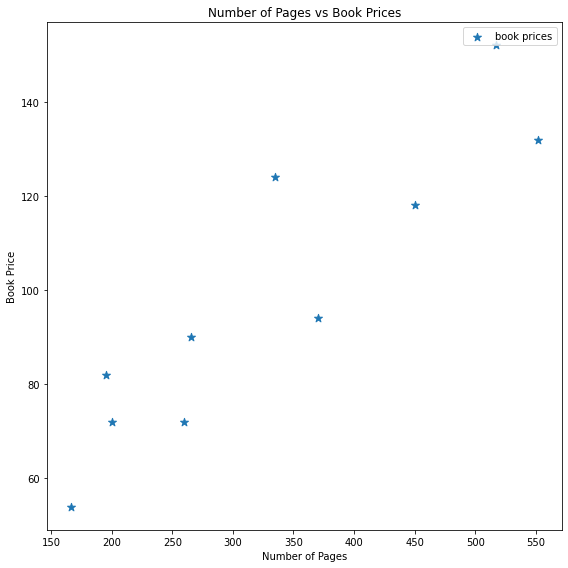

In [14]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('Number of Pages')

ax.set_ylabel('Book Price')

ax.set_title('Number of Pages vs Book Prices')

ax.scatter(x,
           y,
           label='book prices',
           marker='*',
           s = 70)

plt.legend()

plt.tight_layout()

plt.show()

4. Set the number of cluster, $k=3$

In [15]:
k = 3

5. Generate k random number from $[0, data\_size)$

In [16]:
def generate_k_random_numbers(k, n, log):

  # write the function

  return sample_indices

6. Take $k$ data points to represent as centroids using the random indices generated above.

In [17]:
def get_centroid_seeds(data_points, indices, log):

  centroids = np.array(data_points[indices, :])

  if log:
    
    print('Selected Centroids: {}'.format(centroids))

  return centroids

7. Write a function to calucate the Eucledian Distance.

In [18]:
def eucledian_distance(a, b):

  # Frobenius Norm

  # write the function

  return distance

8. Write a function that will find the index of the closest centroid from a data point.

In [19]:
def get_closest_centroid_index(data_point, centroids, log):
  
  # complete the function

  if log:

    print("Closest Centroid Index of {0} is {1}".format(data_point, closest_centroid_index))

  return closest_centroid_index

9. Write a function to create k initial clusters.

In [20]:
def create_clusters(data_points, centroids, k, log):

  clusters = [[] for _ in range(k)]

  for data_point_index, data_point in enumerate(data_points):

    closest_centroid_index = get_closest_centroid_index(data_point, centroids, log)

    clusters[closest_centroid_index].append(data_point_index)

  if log:

    print("Clusters: {0}".format(clusters))

  return clusters

10. Write a function that will update the centroids.

In [21]:
def update_centroid(data_points, clusters, k, log):

  # complete the function

  if log:

    print("Centroids: {0}".format(centroids))

  return centroids

11. Write a function that will check the convergence of the algorithm.

In [22]:
def is_converged(previous_centroids, centroids, k, iteration):

  errors = [eucledian_distance(previous_centroids[i], centroids[i]) for i in range(k)]

  print("Error on {0}th Iteration is {1}".format(iteration, sum(errors)))

  return sum(errors) == 0, sum(errors)

12. Write a function that will return a list containing the corresponding label(cluster number) of each data points.

In [23]:
def get_labels(clusters, n, log):

  labels = np.zeros(n)

  for cluster_index, cluster in enumerate(clusters):

    for data_point_index in cluster:

      labels[data_point_index] = cluster_index

  if log:

    print('Labels: {0}'.format(labels))

  return labels

14. Write a plot function that will change show the current state of clustering.

In [24]:
def plot(data_points, clusters, centroids):

  fig_width = 8

  fig_height = 8

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

  ax.set_xlabel('Number of Pages')

  ax.set_ylabel('Book Price')

  ax.set_title('Number of Pages vs Book Prices')

  for i, index in enumerate(clusters):
    
    point = data_points[index].T
    
    ax.scatter(*point)

  for point in centroids:

      ax.scatter(*point, 
                 marker="x",
                 s = 100, 
                 color="black", 
                 linewidth=2)

  # plt.legend()

  plt.tight_layout()

  plt.show()

14. Write a function that will perfom the K-Mean clustering on the given data points.

In [25]:
def k_means(data_points, k, iteration_threshold, plot_data_points, log):

  # generating k random indices for picking the centroid seeds
  sample_indices = generate_k_random_numbers(k, data_points.shape[0], log)

  print('{0} Random Indices Generated'.format(len(sample_indices)))

  # selecting data points as centroids based on the random indices
  centroids = get_centroid_seeds(data_points, sample_indices, log)

  print('{0} Centroid(s) [Seed] Selected'.format(len(centroids)))

  errors = []
  
  # optimization process
  for i in range(iteration_threshold):

    # creating/updating clusters
    clusters = create_clusters(data_points, centroids, k, log)

    if plot_data_points:

      plot(data_points, clusters, centroids)

    # keeping a copy of the previous centroid
    previous_centroids = centroids.copy()

    # updating centroids
    centroids = update_centroid(data_points, clusters, k, log)

    # checking for convergence

    converged, current_error = is_converged(previous_centroids, centroids, k, i)

    errors.append(current_error)

    if converged:

      break

  # get label for each data point

  labels = get_labels(clusters, data_points.shape[0], log)

  return labels, centroids, clusters, errors

Initial Random Indices [9, 1, 5]:
3 Random Indices Generated
Selected Centroids: [[552 132]
 [195  82]
 [335 124]]
3 Centroid(s) [Seed] Selected
Closest Centroid Index of [166  54] is 1
Closest Centroid Index of [195  82] is 1
Closest Centroid Index of [200  72] is 1
Closest Centroid Index of [260  72] is 1
Closest Centroid Index of [265  90] is 1
Closest Centroid Index of [335 124] is 2
Closest Centroid Index of [370  94] is 2
Closest Centroid Index of [450 118] is 0
Closest Centroid Index of [517 152] is 0
Closest Centroid Index of [552 132] is 0
Clusters: [[7, 8, 9], [0, 1, 2, 3, 4], [5, 6]]


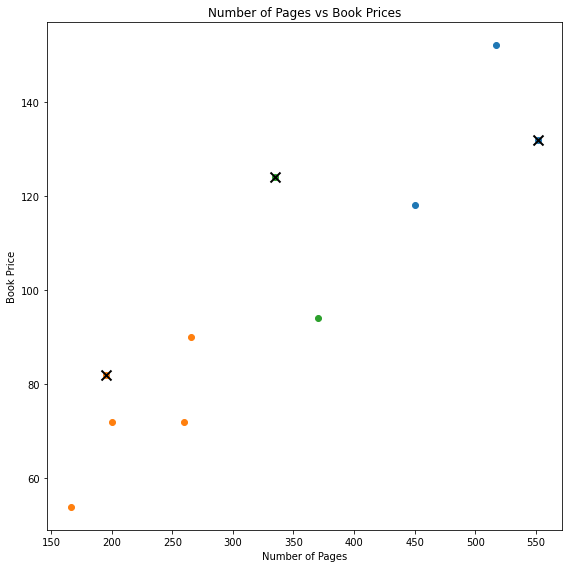

Centroids: [[506.33333333 134.        ]
 [217.2         74.        ]
 [352.5        109.        ]]
Error on 0th Iteration is 92.35675993999767
Closest Centroid Index of [166  54] is 1
Closest Centroid Index of [195  82] is 1
Closest Centroid Index of [200  72] is 1
Closest Centroid Index of [260  72] is 1
Closest Centroid Index of [265  90] is 1
Closest Centroid Index of [335 124] is 2
Closest Centroid Index of [370  94] is 2
Closest Centroid Index of [450 118] is 0
Closest Centroid Index of [517 152] is 0
Closest Centroid Index of [552 132] is 0
Clusters: [[7, 8, 9], [0, 1, 2, 3, 4], [5, 6]]


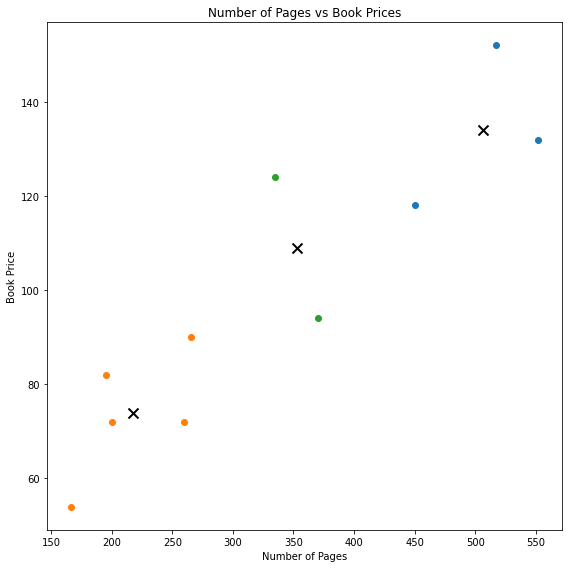

Centroids: [[506.33333333 134.        ]
 [217.2         74.        ]
 [352.5        109.        ]]
Error on 1th Iteration is 0.0
Labels: [1. 1. 1. 1. 1. 2. 2. 0. 0. 0.]


In [26]:
labels, centroids, clusters, errors = k_means(book_price, 
                                              k, 
                                              100, 
                                              True, 
                                              True)

15. Plot the points again and change the color of the points based on their labels. Moreover, also plot the errors.

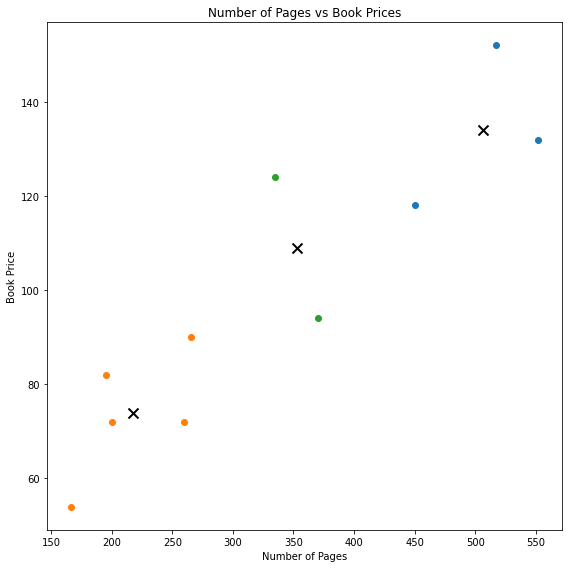

In [27]:
plot(book_price, clusters, centroids)

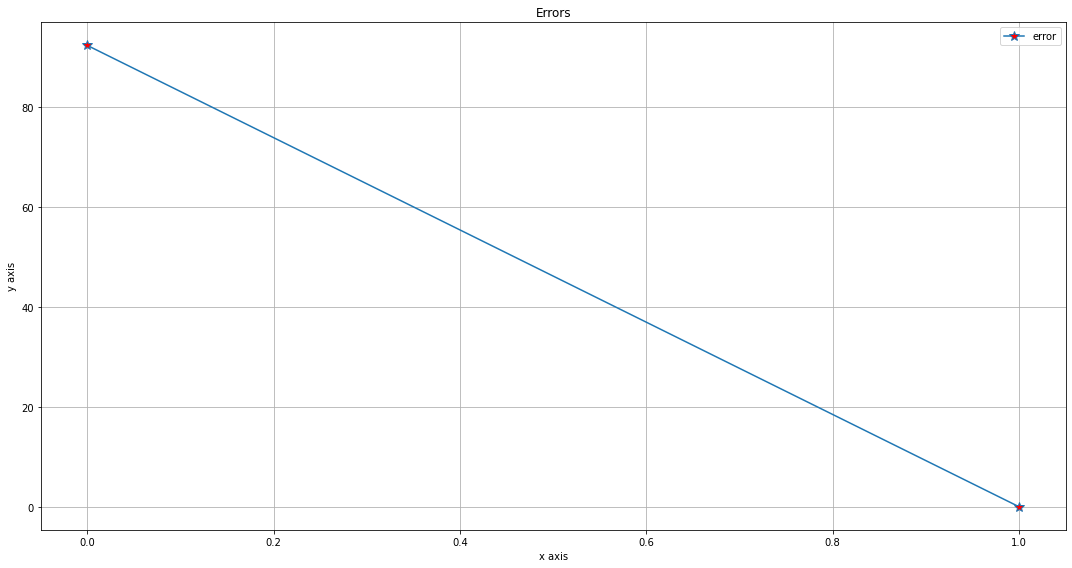

In [28]:
x = np.arange(len(errors))

error = errors

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('x axis')

ax.set_ylabel('y axis')

ax.set_title('Errors')

ax.plot(x,
        error,
        label='error',
        marker='*',
        markersize=10,
        MarkerFaceColor='r')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

16. Generate n random m feature vectors and run k mean on them for a suitable k.

In [29]:
n = 200
m = 2
k = 6

In [30]:
data_points = np.random.rand(n, m)

print(data_points)

[[4.57492241e-02 2.12245779e-01]
 [8.29155108e-01 9.62847736e-01]
 [2.75130253e-01 3.15971964e-04]
 [3.59444520e-01 4.25326705e-01]
 [2.86281254e-01 5.41405939e-02]
 [1.65705006e-01 5.84911813e-01]
 [9.53064223e-02 7.60713490e-01]
 [1.72219723e-01 9.55821562e-01]
 [1.52813708e-01 1.56342396e-01]
 [6.43691666e-01 9.17626856e-01]
 [4.91038933e-01 3.19167500e-01]
 [7.41594187e-01 3.93360962e-02]
 [3.86810718e-01 3.14736292e-01]
 [6.66305626e-01 9.77790621e-01]
 [5.04822968e-01 3.04667784e-01]
 [4.77790367e-01 9.09349480e-01]
 [1.10466621e-01 4.36426904e-01]
 [2.20121460e-01 8.45307298e-02]
 [5.28558412e-01 7.38961920e-01]
 [6.84416677e-01 1.01777690e-01]
 [1.82216333e-02 3.42315430e-01]
 [1.49687840e-01 3.08770468e-01]
 [9.15427904e-01 9.41104192e-01]
 [8.67196773e-01 2.66907944e-01]
 [1.03140851e-01 2.44862051e-01]
 [8.89080408e-01 2.29274832e-01]
 [2.44023854e-01 8.51454494e-01]
 [3.21909455e-01 3.26933443e-01]
 [3.12092757e-01 4.24794139e-02]
 [5.62717194e-01 9.18334389e-01]
 [8.046643

In [31]:
x = data_points[:, 0]

y = data_points[:, 1]

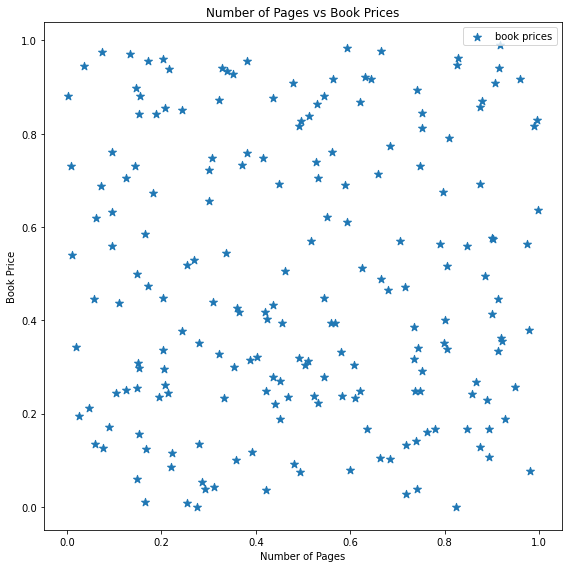

In [32]:
fig_width = 8

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('Number of Pages')

ax.set_ylabel('Book Price')

ax.set_title('Number of Pages vs Book Prices')

ax.scatter(x,
           y,
           label='book prices',
           marker='*',
           s = 70)

plt.legend()

plt.tight_layout()

plt.show()

6 Random Indices Generated
6 Centroid(s) [Seed] Selected


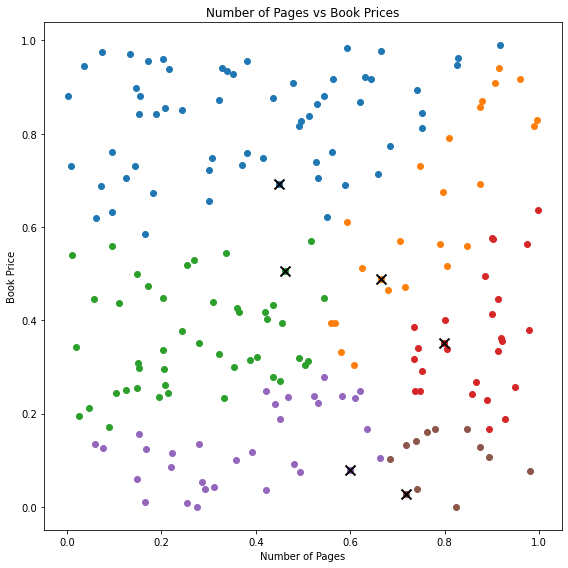

Error on 0th Iteration is 0.9634759398939061


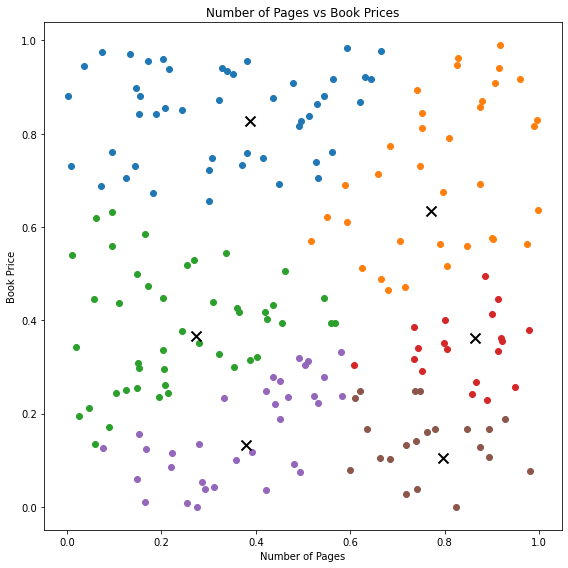

Error on 1th Iteration is 0.28645333104065634


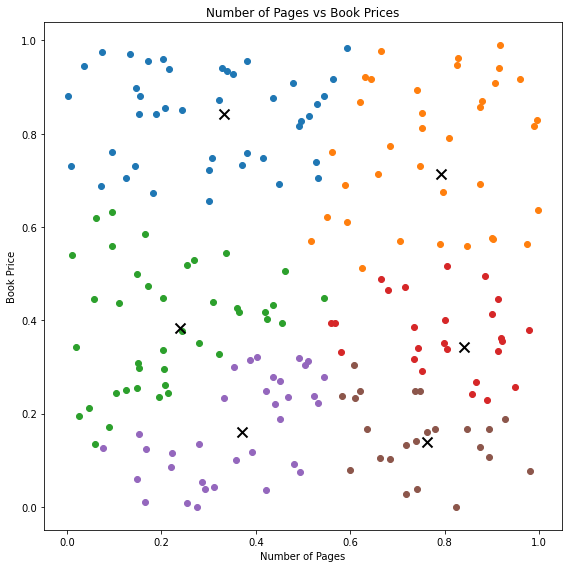

Error on 2th Iteration is 0.19740051102824474


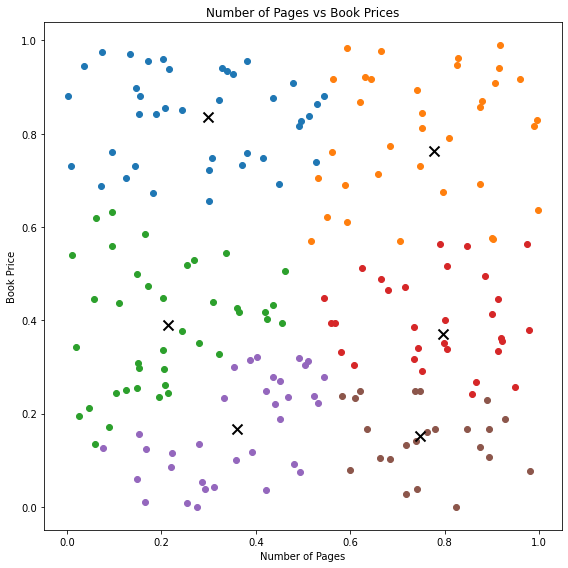

Error on 3th Iteration is 0.11503322449530619


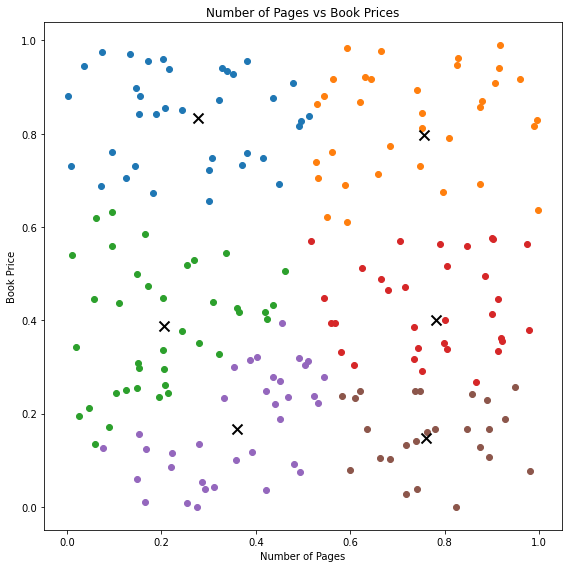

Error on 4th Iteration is 0.11705881593620732


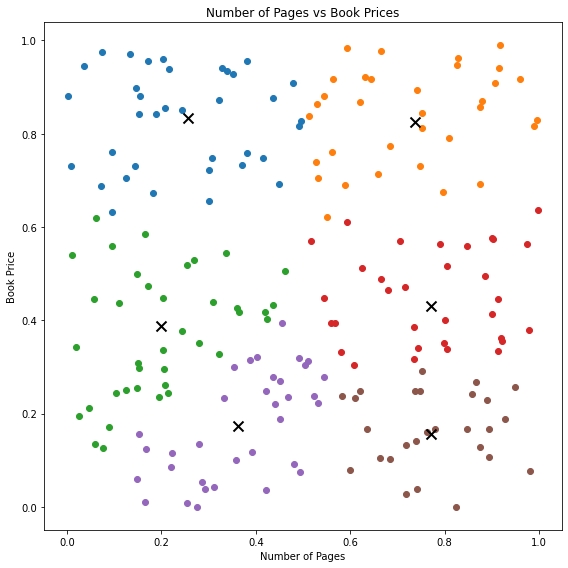

Error on 5th Iteration is 0.08216494535775823


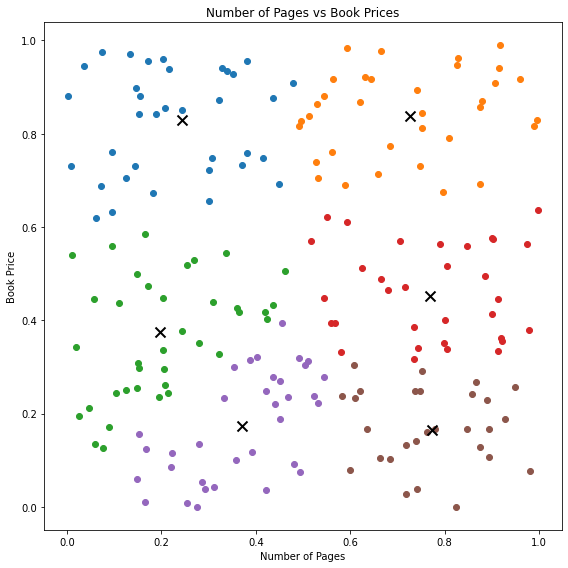

Error on 6th Iteration is 0.055740728769271955


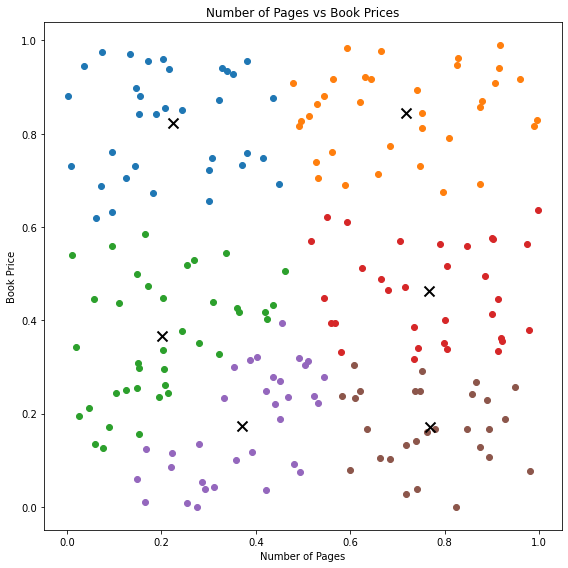

Error on 7th Iteration is 0.02732351818170818


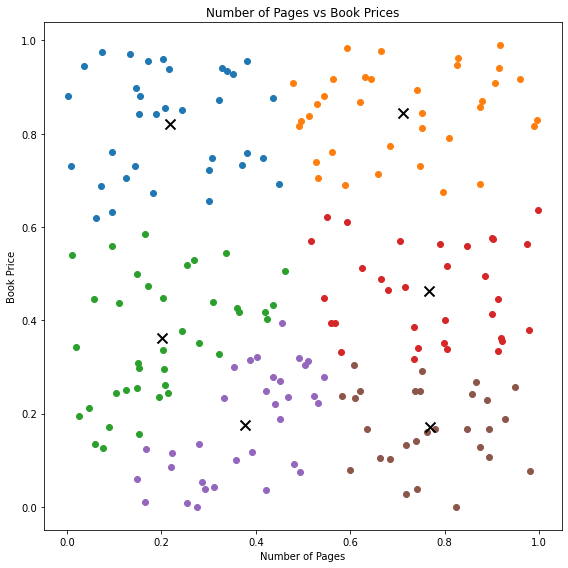

Error on 8th Iteration is 0.0


In [33]:
labels, centroids, clusters, errors = k_means(data_points, 
                                              k, 
                                              100, 
                                              True, 
                                              False)

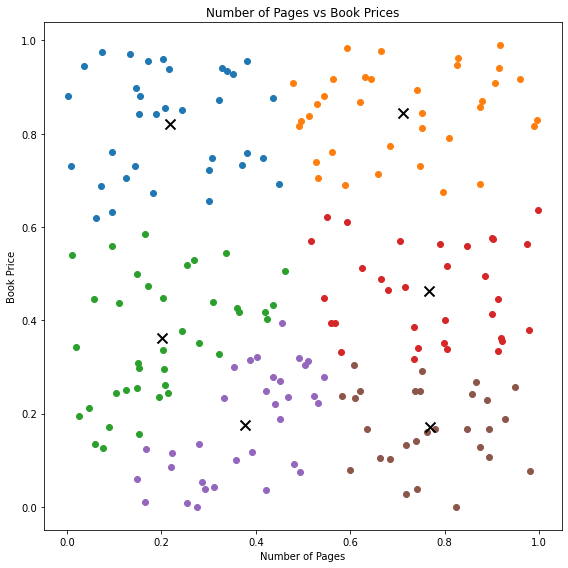

In [34]:
plot(data_points, clusters, centroids)

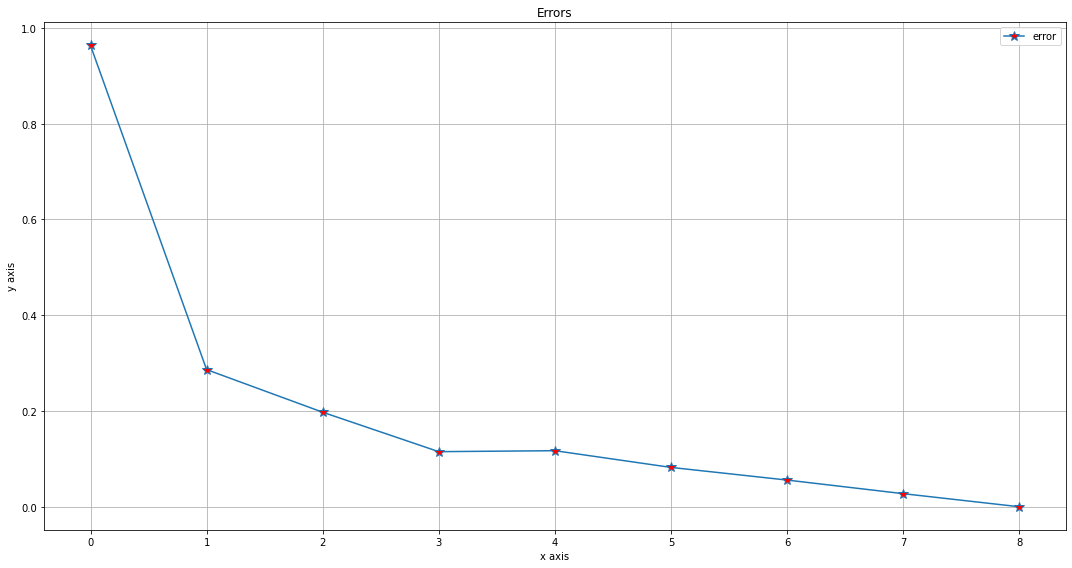

In [35]:
x = np.arange(len(errors))

error = errors

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('x axis')

ax.set_ylabel('y axis')

ax.set_title('Errors')

ax.plot(x,
        error,
        label='error',
        marker='*',
        markersize=10,
        MarkerFaceColor='r')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

# **MNIST Dataset Clustering Problem**

1. Download and Load the MNIST Dataset of handwritten digits.

  [MNIST Main](http://yann.lecun.com/exdb/mnist/)
  
  [MNIST Wiki](https://en.wikipedia.org/wiki/MNIST_database)

In [36]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Shape of the Dataset

print("Training: {0}".format(X_train.shape))

print("Test:     {0}".format(X_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Training: (60000, 28, 28)
Test:     (10000, 28, 28)


2. Take a sample of the dataset for faster development if needed. For example, 5000.

In [37]:
X_train = X_train[0:5000]

Y_train = Y_train[0:5000]

print(X_train.shape)

(5000, 28, 28)


3. Plot some sample images from the MNIST Dataset

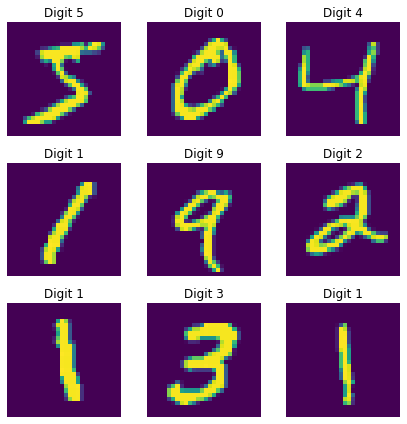

In [38]:
fig_width = 6

fig_height = 6

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(fig_width, fig_height))

for i, ax in enumerate(ax.flat):

    ax.imshow(X_train[i])

    ax.axis('off')

    ax.set_title('Digit {0}'.format(Y_train[i]))

plt.tight_layout()

plt.gray()

plt.show()

4.  Each of the images are 2 dimensional here however we will need 1 dimensional vectors. Write a function that will flatten the 2 dimensional images into 1 dimensional vectos.

In [39]:
def reshape_data_points(data_points):
  
  # complete the function

  return data_points

print(X_train.shape)

X_train = reshape_data_points(X_train)

X_test = reshape_data_points(X_test)

print(X_train.shape)

(5000, 28, 28)
(5000, 784)


5. Normalize the dataset by dividing the dataset by the maximum possible pixel intensity value. e.g 255.

In [40]:
def normalize_data_points(data_points, value):

  data_points = data_points.astype(np.float32) / value

  return data_points

X_train = normalize_data_points(X_train, 255)

X_test = normalize_data_points(X_test, 255)

6. Apply the K-Means Clustering on the image dataset.

In [41]:
k = 10

In [42]:
labels, centroids, clusters, errors = k_means(X_train, 
                                              k, 
                                              10, 
                                              False, 
                                              False)

10 Random Indices Generated
10 Centroid(s) [Seed] Selected
Error on 0th Iteration is 55.65188734331792
Error on 1th Iteration is 11.458818311639472
Error on 2th Iteration is 7.569157545508128
Error on 3th Iteration is 4.108634436890455
Error on 4th Iteration is 2.380336572741189
Error on 5th Iteration is 1.7388684798804235
Error on 6th Iteration is 1.4582140515729654
Error on 7th Iteration is 1.0967740559298158
Error on 8th Iteration is 1.0541149337769715
Error on 9th Iteration is 1.1004443847770535


7. Plot the Errors

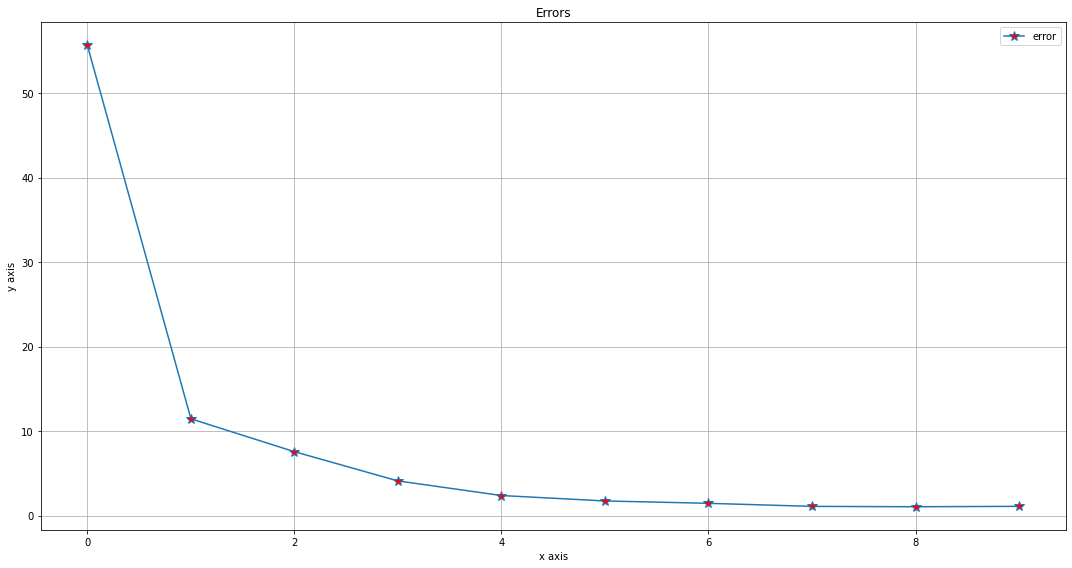

In [43]:
x = np.arange(len(errors))

error = errors

fig_width = 15

fig_height = 8

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

ax.set_xlabel('x axis')

ax.set_ylabel('y axis')

ax.set_title('Errors')

ax.plot(x,
        error,
        label='error',
        marker='*',
        markersize=10,
        MarkerFaceColor='r')

plt.legend()

plt.grid()

plt.tight_layout()

plt.show()

  The found labels are not the real labels of each image. Here label is just a cluster id nothing else. For example, 2 in kmeans label means that has similar features with another object in the same group 2.

8. Calculate the frequency distribution of the actual label in each cluster.

In [44]:
def estimate_cluster_labels(data_point_labels, labels, k):

  estimated_cluster_labels = {}

  for i in range(k):

    current_cluster_labels = []

    indices = np.where(labels == i)

    current_cluster_labels.extend(data_point_labels[indices])

    label_count = np.bincount(current_cluster_labels)

    estimated_cluster_label = np.argmax(label_count)

    if estimated_cluster_label in estimated_cluster_labels:

      estimated_cluster_labels[estimated_cluster_label].append(i)

    else:

      estimated_cluster_labels[estimated_cluster_label] = [i]

  return estimated_cluster_labels

estimated_cluster_labels = estimate_cluster_labels(Y_train, labels, k)

print(estimated_cluster_labels)


{6: [0, 8], 0: [1], 1: [2, 5], 7: [3], 2: [4], 4: [6], 3: [7], 8: [9]}


9. Write a function that can infer the data label

In [45]:
def infer_labels(labels, estimated_cluster_labels):

  predicted_labels = np.zeros(len(labels), dtype=int)

  for i, label in enumerate(labels):

    for key, value in estimated_cluster_labels.items():

      if label in value:

        predicted_labels[i]=key

  return predicted_labels

predicted_labels = infer_labels(labels, estimated_cluster_labels)

print(predicted_labels)

[8 0 4 ... 2 1 6]


10. Write a function that will find the error between the true label and the estimated label

In [46]:
import sklearn.metrics

def accuracy(data_point_labels, predicted_labels):

  difference = data_point_labels - predicted_labels

  accuracy_score = sklearn.metrics.accuracy_score(data_point_labels, predicted_labels)

  return accuracy_score

calculated_accracy = accuracy(Y_train, predicted_labels)

print('Training Accuracy: {0:.2f}%'.format(calculated_accracy*100))

Training Accuracy: 56.20%


11. Write a function that will optimize the value of k.

Optimization Step: 0
10 Random Indices Generated
10 Centroid(s) [Seed] Selected
Error on 0th Iteration is 51.512961553854055
Error on 1th Iteration is 8.111970345400525
Error on 2th Iteration is 5.26911060276665
Error on 3th Iteration is 3.6746444932515137
Error on 4th Iteration is 2.424566464475985
Error on 5th Iteration is 2.0250423349367126
Error on 6th Iteration is 1.4953892507491906
Error on 7th Iteration is 1.089154849104903
Error on 8th Iteration is 0.7602370998350698
Error on 9th Iteration is 0.665767731465222
Number of Cluster: 10
Training Accuracy: 45.7%
Optimization Step: 1
50 Random Indices Generated
50 Centroid(s) [Seed] Selected
Error on 0th Iteration is 211.3367109392674
Error on 1th Iteration is 53.2302358554381
Error on 2th Iteration is 25.855771702376966
Error on 3th Iteration is 16.386938604073507
Error on 4th Iteration is 9.871722704152695
Error on 5th Iteration is 5.6426499559190555
Error on 6th Iteration is 3.8308403130095576
Error on 7th Iteration is 3.7216357641

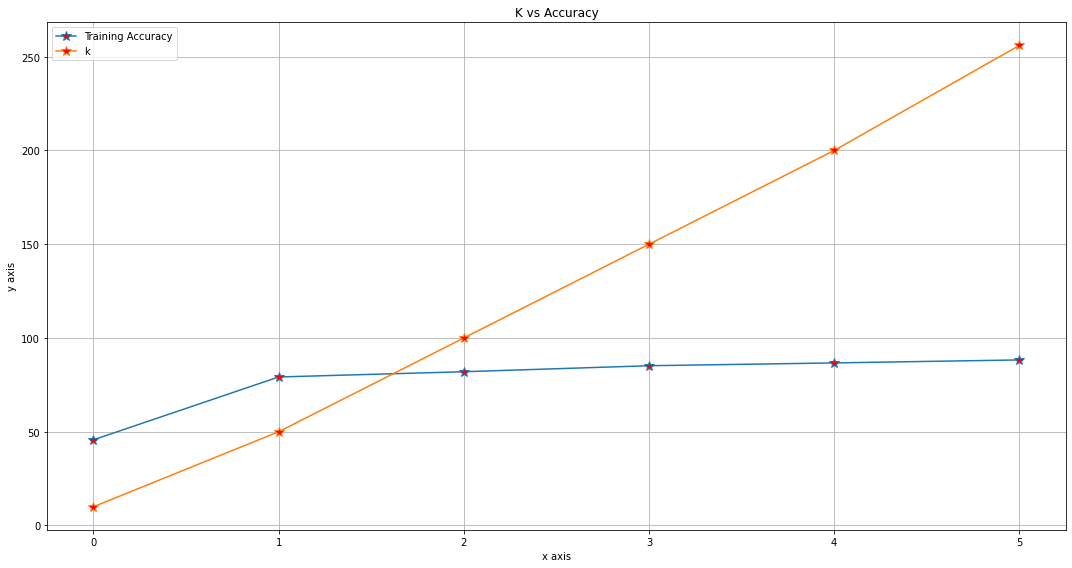

Optimal K: 256


In [47]:
def optimize_k(k_values, data_points, data_point_labels, iteration_number):

  errors_list = []

  accuracy_list = []

  best_accuracy = 0

  optimal_k = None

  output = None

  for i, current_k in enumerate(k_values):

    print('Optimization Step: {0}'.format(i))

    labels, centroids, clusters, errors = k_means(data_points, 
                                                  current_k, 
                                                  iteration_number, 
                                                  False, 
                                                  False)
    
    errors_list.append(errors)

    estimated_cluster_labels = estimate_cluster_labels(data_point_labels, labels, current_k)

    predicted_labels = infer_labels(labels, estimated_cluster_labels)

    current_accuracy = accuracy(data_point_labels, predicted_labels)

    accuracy_list.append(current_accuracy*100)

    print('Number of Cluster: {0}'.format(current_k))

    print('Training Accuracy: {0}%'.format(current_accuracy*100))

    if current_accuracy > best_accuracy:

      optimal_k = current_k

      output = [labels, centroids, clusters, errors]

  x = np.arange(len(k_values))

  fig_width = 15

  fig_height = 8

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(fig_width, fig_height))

  ax.set_xlabel('x axis')

  ax.set_ylabel('y axis')

  ax.set_title('K vs Accuracy')

  ax.plot(x,
          accuracy_list,
          label='Training Accuracy',
          marker='*',
          markersize=10,
          MarkerFaceColor='r')
  
  ax.plot(x,
          k_values,
          label='k',
          marker='*',
          markersize=10,
          MarkerFaceColor='r')

  plt.legend()

  plt.grid()

  plt.tight_layout()

  plt.show()

  return optimal_k, labels, centroids, clusters, errors

optimal_k, labels, centroids, clusters, errors = optimize_k([10, 50, 100, 150, 200, 256],X_train[:1000], Y_train[:1000], 10)

print("Optimal K: {0}".format(optimal_k))

12. Run the K-Means Clustering algorithm using the optimal value of k.

In [48]:
k = optimal_k

In [49]:
labels, centroids, clusters, errors = k_means(X_train, 
                                              k, 
                                              10, 
                                              False, 
                                              False)
  
estimated_cluster_labels = estimate_cluster_labels(Y_train, labels, k)

predicted_labels = infer_labels(labels, estimated_cluster_labels)

current_accuracy = accuracy(Y_train, predicted_labels)

print('Number of Cluster: {0}'.format(k))

print('Training Accuracy: {0}%'.format(current_accuracy*100))

256 Random Indices Generated
256 Centroid(s) [Seed] Selected
Error on 0th Iteration is 943.3590573621863
Error on 1th Iteration is 221.59437531974194
Error on 2th Iteration is 119.65638852526737
Error on 3th Iteration is 77.99302118558823
Error on 4th Iteration is 54.81166420875041
Error on 5th Iteration is 30.9117589832255
Error on 6th Iteration is 26.130793611702938
Error on 7th Iteration is 21.470489282813922
Error on 8th Iteration is 12.128271581316534
Error on 9th Iteration is 6.932695927494397
Number of Cluster: 256
Training Accuracy: 87.83999999999999%


13. Show some of the training images along with their predicted label.

In [50]:
n = 5000

normalization_value = 255

Accuracy: 87.5%


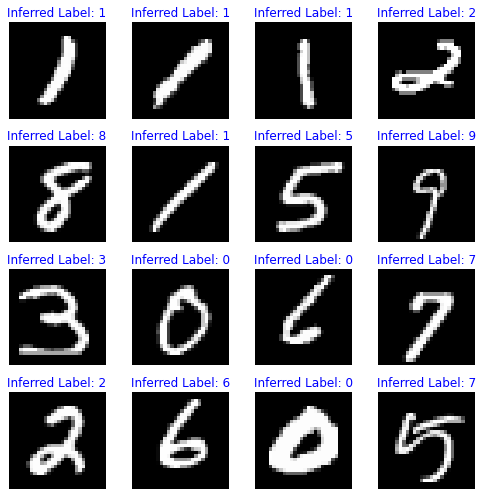

In [51]:
images = X_train.reshape(n, 28, 28)

images = images * normalization_value

fig_width = 7

fig_height = 7

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(fig_width, fig_height))

random_number_list = []

for i, ax in enumerate(ax.flat):

    random_number = np.random.randint(len(images))

    random_number_list.append(random_number)

    ax.imshow(images[random_number])

    ax.axis('off')

    ax.set_title('Inferred Label: {}'.format(predicted_labels[random_number]), color='blue')

print('Accuracy: {0}%'.format(accuracy(Y_train[random_number_list], predicted_labels[random_number_list])*100))

plt.tight_layout()

plt.gray()

plt.show()

14. Write a function that will test the testing data using the calculated clusters.

In [52]:
def test_model(predicted_labels, centroids, X_test, Y_test):

  prediction_list = []

  true_value_list = []

  # complete the function
  
  print("Testing Accuracy {0}%".format(accuracy(np.array(prediction_list), np.array(true_value_list))*100))

  return prediction_list, true_value_list


prediction_list, true_value_list = test_model(predicted_labels, centroids, X_test, Y_test)

Testing Accuracy 87.16000000000001%


Extra Reading
1. https://realpython.com/k-means-clustering-python/